(01_ML_Dimensionality Reduction.pdf, p.43)

# 1. Wine Dataset

지금까지 주어진 Dimension Reduction Methods dimension을 변화시키면서 LR을 학습하여 비교

• Test data에 대해서 transform이 가능한 경우만 사용!

• 차원: 2/3/5 인 경우!

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import manifold, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

In [ ]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df_wine.shape

(178, 14)

In [ ]:
df_wine.columns = ['Class label','Alcohol','Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

In [ ]:
X.shape

(178, 13)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [ ]:
[X_train, X_test] = train_test_split(X, test_size = 0.3, stratify = y, random_state = 0)
[y_train, y_test] = train_test_split(y, test_size = 0.3, stratify = y, random_state = 0)

In [ ]:
X_train.shape

(124, 13)

In [ ]:
X_test.shape

(54, 13)

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

var_exp

[0.3695146859960764,
 0.18434927059884165,
 0.11815159094596991,
 0.07334251763785465,
 0.06422107821731675,
 0.050517244849076576,
 0.03954653891241444,
 0.026439183169219987,
 0.023893192591852967,
 0.01629613773725104,
 0.013800211221948432,
 0.011722262443085978,
 0.008206085679091384]

In [ ]:
cum_var_exp

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.96627144,
       0.98007165, 0.99179391, 1.        ])

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

1) PCA(n_components = 2)

In [ ]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

In [ ]:
var_exp_2 = pca.explained_variance_ratio_
var_exp_2

array([0.36951469, 0.18434927])

In [ ]:
cum_var_exp_2 = np.sum(var_exp_2)
cum_var_exp_2

0.553863956594918

2) PCA(n_components = 3)

In [ ]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

In [ ]:
var_exp_3 = pca.explained_variance_ratio_
var_exp_3

array([0.36951469, 0.18434927, 0.11815159])

In [ ]:
cum_var_exp_3 = np.sum(var_exp_3)
cum_var_exp_3

0.672015547540888

3) PCA(n_components = 5)

In [ ]:
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

In [ ]:
var_exp_5 = pca.explained_variance_ratio_

In [ ]:
cum_var_exp_5 = np.sum(var_exp_5)
cum_var_exp_5

0.8095791433960593

In [ ]:
#cumulative explained variance ratio when the number of principal components is 2,3, and 5, respectively
print(cum_var_exp_2,cum_var_exp_3,cum_var_exp_5)

0.553863956594918 0.672015547540888 0.8095791433960593


In [ ]:
eigen_vals_part = eigen_vals[:5]
eigen_vecs_part = eigen_vecs[:,5]
eigen_vals_part

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161])

In [ ]:
tot_part = sum(eigen_vals_part)
var_exp_part = [(i / tot) for i in sorted(eigen_vals_part, reverse = True)]
cum_var_exp_part = np.cumsum(var_exp_part)

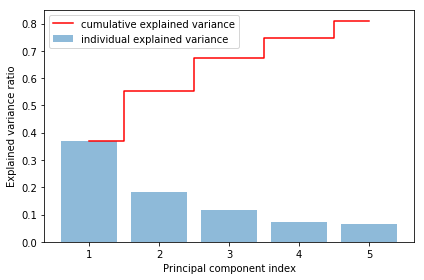

In [ ]:
plt.bar(range(1, 6), var_exp_part, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1, 6), cum_var_exp_part, where='mid',label='cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 2. Swissroll data에 적용!

Manifold Learning

In [ ]:
from time import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

In [ ]:
X.shape

(1500, 3)

In [ ]:
color.shape

(1500,)

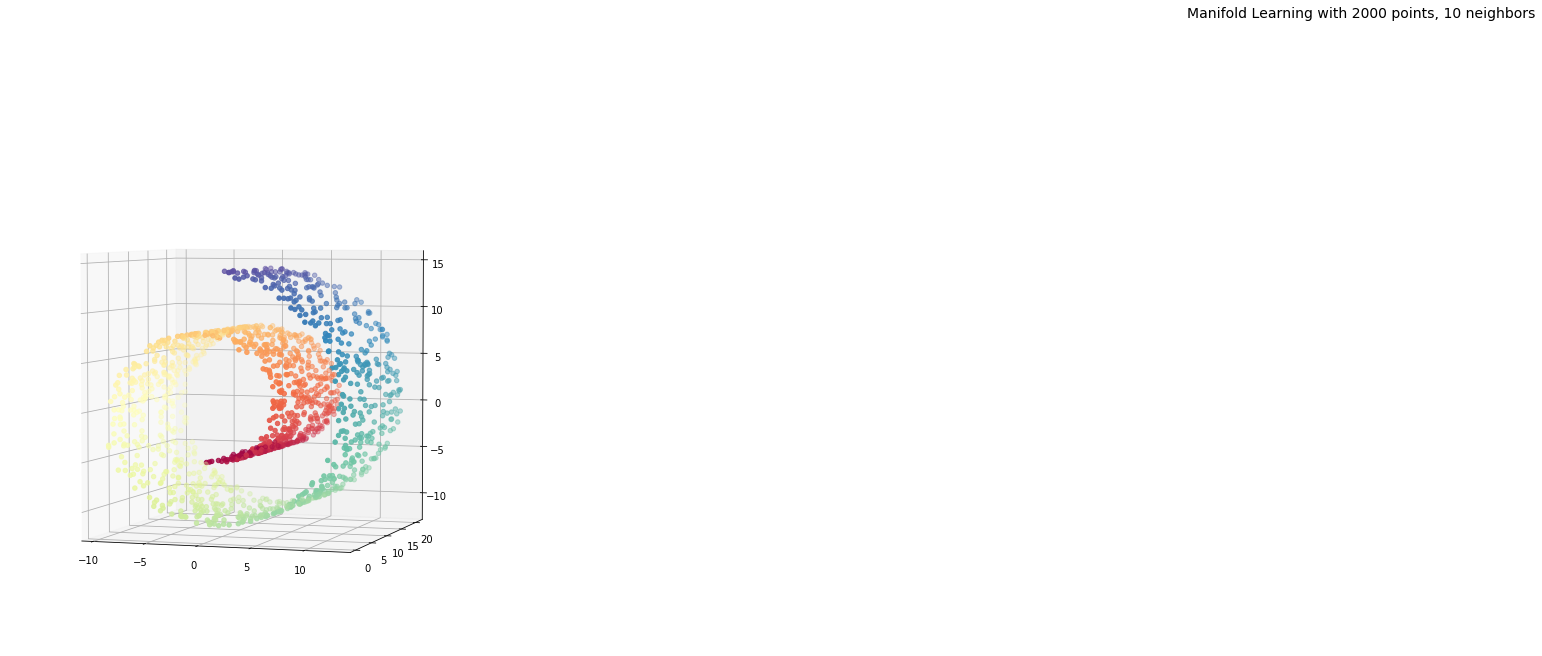

In [ ]:
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)
n_points = 2000
n_neighbors = 10
n_components =2

fig = plt.figure(figsize=(50, 20))
plt.suptitle("Manifold Learning with %i points, %i neighbors" %(2000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

1) LocalLinearEmbedding(LLE)

In [ ]:
lle = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver = 'auto', method = method)

In [ ]:
Y = lle.fit_transform(X)

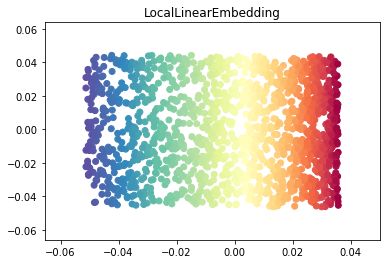

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.title('LocalLinearEmbedding')
plt.show()

2) Isomap

In [ ]:
iso = manifold.Isomap(n_neighbors, n_components)
Y = iso.fit_transform(X)

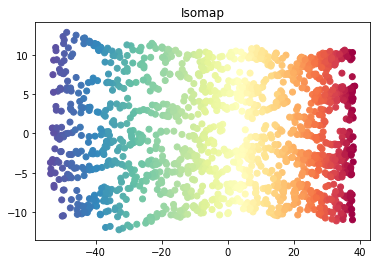

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.title('Isomap')
plt.show()

3) Multi-dimensioncal Scailing(MDS)

In [ ]:
mds = manifold.MDS(n_components, max_iter =100, n_init =1)
Y = mds.fit_transform(X)

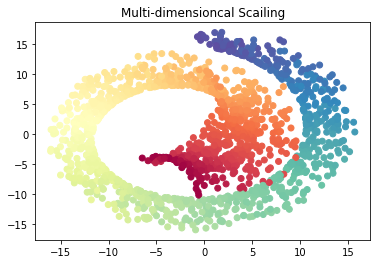

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('Multi-dimensioncal Scailing')
plt.show()

4) Spectral Embedding

In [ ]:
se = manifold.SpectralEmbedding(n_components = n_components, n_neighbors = n_neighbors)
Y = se.fit_transform(X)

C:\Users\User\Anaconda3\lib\site-packages\scipy\sparse\csgraph\_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


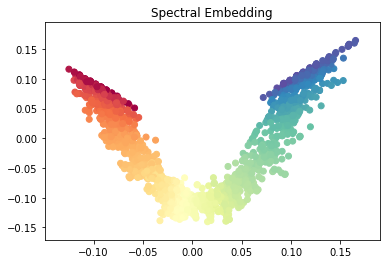

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('Spectral Embedding')
plt.show()

5) T-SNE

In [ ]:
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)

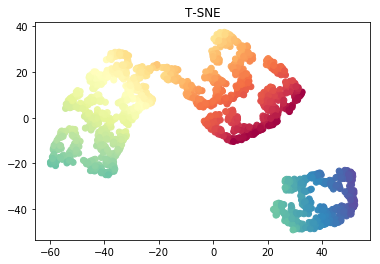

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('T-SNE')
plt.show()